In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob

import seaborn as sns
from matplotlib.colors import LogNorm, Normalize
import astropy.units as u
from astropy.cosmology import Planck18, z_at_value

In [12]:
import matplotlib

font = {'family' : 'serif',
        'size'   : 16}

matplotlib.rc('font', **font)


In [13]:
plotdir = 'powerlaw_3.5_plots/'

In [26]:
# Mc_files = ['powerlaw_3.5_lams/lam_0_1_linear_grid_0_to_576.csv']
Mc_files = ['powerlaw_3.5_lams/powerlaw_alpha_3.5_lam_0_1_Mc_0_1296.csv']



df1 = pd.DataFrame()
for fi in Mc_files:
    df_temp = pd.read_csv(fi)
    df1 = df1.append(df_temp)
# drop the zero rows that resulted from NoneType Networks
df = df1.loc[~(df1==0).all(axis=1)]


In [27]:
# drop the zero rows that resulted from NoneType Networks
# df = df.loc[~(df==0).all(axis=1)]
df = df[df["Mc"] > 0]


# Convert everything to source mass
df["Mc"] = df["Mc"] / (1+df["z"])
df["M_tot"] = df["M_tot"] / (1+df["z"])
df["m1"] = df["m1"] / (1+df["z"])
df["m2"] = df["m2"] / (1+df["z"])


print("Total number of events:",len(df))


df

Total number of events: 1296


,Mc,eta,DL,z,m1,m2,M_tot,q,snr,inspiral_t,...,inner_10,inner_11,inner_12,inner_13,inner_14,inner_15,inner_16,inner_17,inner_18,inner_19
0,3.579393,0.228697,34104.741036,3.763632,5.603472,3.071211,8.674683,1.824515,13.076655,79.648600,...,0.928975,0.919453,0.910551,0.902395,0.895032,0.888444,0.882546,0.877206,0.872261,0.867530
1,4.067540,0.231933,27335.054235,3.126338,6.201359,3.573587,9.774945,1.735332,9.868996,81.818906,...,0.930560,0.921288,0.912631,0.904706,0.897558,0.891162,0.885434,0.880242,0.875421,0.870795
2,5.069385,0.204987,26062.223477,3.004439,9.343270,3.776300,13.119570,2.474186,15.783481,59.147570,...,0.910668,0.898328,0.886710,0.876003,0.866309,0.857645,0.849946,0.843078,0.836857,0.831071
3,3.600670,0.233727,46501.921384,4.894599,5.405276,3.207798,8.613074,1.685043,12.084155,55.136060,...,0.908157,0.896006,0.884759,0.874598,0.865599,0.857741,0.850914,0.844934,0.839569,0.834564
4,2.667242,0.188044,13486.523547,1.745903,5.444223,1.825311,7.269534,2.982627,10.051910,325.965125,...,0.974710,0.970829,0.966985,0.963216,0.959544,0.955976,0.952504,0.949109,0.945764,0.942440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291,2.114098,0.160009,32653.967702,3.628462,5.078329,1.269699,6.348027,3.999634,6.510200,200.548301,...,0.961962,0.956080,0.950261,0.944573,0.939063,0.933752,0.928641,0.923709,0.918923,0.914237
1292,4.982784,0.240461,21934.552878,2.603526,7.003326,4.714448,11.717774,1.485503,22.972455,73.133180,...,0.924839,0.915019,0.905933,0.897702,0.890368,0.883888,0.878155,0.873007,0.868252,0.863685
1293,5.188388,0.234567,24527.086516,2.856391,7.730628,4.653679,12.384308,1.661186,20.464452,60.910698,...,0.814975,0.804571,0.800136,0.801226,0.806771,0.815258,0.824954,0.834125,0.841207,0.844929
1294,9.090615,0.246706,12217.745825,1.610813,11.734036,9.317582,21.051618,1.259343,31.697173,45.754464,...,0.895038,0.881620,0.869393,0.858554,0.849170,0.841181,0.834420,0.828634,0.823516,0.818741


In [28]:
n_lams = 20
lam_colnames = ['lam_'+str(id) for id in range(n_lams)]
lams = df[lam_colnames].iloc[0].values

bias_colnames = ['bias_'+str(id) for id in range(n_lams)]
bias_lams = df[bias_colnames]
rel_bias_lams = df[bias_colnames].div(df["Mc"], axis='rows')

sig_bias_lams = df[bias_colnames].div(df["Mc_stat_err"], axis='rows')

inner_colnames = ['inner_'+str(id) for id in range(n_lams)]
inner_prod_lams = df[inner_colnames]

rel_bias_lams

,bias_0,bias_1,bias_2,bias_3,bias_4,bias_5,bias_6,bias_7,bias_8,bias_9,bias_10,bias_11,bias_12,bias_13,bias_14,bias_15,bias_16,bias_17,bias_18,bias_19
0,8.957239e-16,0.000016,0.000058,0.000151,0.000303,0.000507,0.000737,0.000951,0.001097,0.001125,0.000988,0.000659,0.000129,0.000584,0.001442,0.002386,0.003350,0.004264,0.005062,0.005695
1,7.632194e-16,0.000025,0.000073,0.000145,0.000243,0.000358,0.000478,0.000579,0.000635,0.000618,0.000502,0.000267,0.000096,0.000583,0.001178,0.001851,0.002563,0.003271,0.003929,0.004494
2,8.575884e-16,0.000087,0.000279,0.000609,0.001087,0.001694,0.002377,0.003056,0.003632,0.004001,0.004068,0.003765,0.003060,0.001961,0.000521,0.001171,0.003001,0.004844,0.006576,0.008090
3,1.170912e-15,0.000084,0.000287,0.000663,0.001218,0.001906,0.002633,0.003266,0.003659,0.003680,0.003229,0.002265,0.000811,0.001040,0.003141,0.005310,0.007349,0.009076,0.010346,0.011064
4,1.772640e-16,0.000004,0.000011,0.000022,0.000039,0.000061,0.000085,0.000109,0.000129,0.000139,0.000137,0.000120,0.000087,0.000038,0.000025,0.000097,0.000173,0.000249,0.000319,0.000379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291,4.503494e-17,0.000016,0.000042,0.000085,0.000146,0.000224,0.000308,0.000388,0.000447,0.000470,0.000445,0.000362,0.000218,0.000018,0.000227,0.000502,0.000787,0.001061,0.001302,0.001496
1292,6.753318e-16,0.000028,0.000101,0.000241,0.000454,0.000724,0.001014,0.001272,0.001439,0.001461,0.001297,0.000928,0.000363,0.000365,0.001197,0.002061,0.002879,0.003579,0.004103,0.004414
1293,6.894311e-16,0.001272,0.002260,0.002791,0.002827,0.002475,0.001948,0.001493,0.001312,0.001495,0.001978,0.002563,0.002965,0.002907,0.002198,0.000813,0.001090,0.003192,0.005087,0.006387
1294,5.983931e-16,0.000042,0.000159,0.000384,0.000722,0.001139,0.001575,0.001946,0.002159,0.002133,0.001812,0.001175,0.000244,0.000914,0.002202,0.003501,0.004690,0.005658,0.006323,0.006636


In [29]:
def plot_bias_features(x, y, feature, show_unbiased=False, mtot=None, qmax=None, colormap='RdBu_r',\
        xlabel="Mc ($M_\odot$)", ylabel="$\eta", cbar_label="Faithfulness",\
        title="Minimum Faithfulness required \nfor unbiased Mc", xlim=None, ylim=None, plt_show=True, savefig=None, **kwargs):
    
    mask = np.ones(len(df["Mc"]), dtype=bool)
    z = df["z"].iloc[0]

    if qmax is not None:
        mask = mask * (df["q"] < qmax) 
        title = title + " (q < " + str(np.round(qmax,2)) + ")"
    
    x = x[mask]
    y = y[mask]
    feature = feature[mask]

    fig, ax = plt.subplots(figsize=(8, 6))
    cm = plt.cm.get_cmap(colormap)

    sc = plt.scatter(x, y, c=feature, cmap=cm, **kwargs)
    cbar = plt.colorbar(sc)
    cbar.set_label(cbar_label)

    if show_unbiased:
        unbiased_mask = (df["Mc_stat_err"]>df["bias_9"])
        plt.scatter(x[unbiased_mask*mask], y[unbiased_mask*mask], c="white",  s=100, edgecolors='g', lw=3, label='Unbiased')
        plt.legend()

    if xlim:
        plt.xlim(xlim)
    if ylim:
        plt.ylim(ylim)
        
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    plt.tight_layout()

    if savefig is not None:
        plt.savefig(plotdir+savefig+'.pdf')
    if plt_show:
        plt.show()


# Overall Population

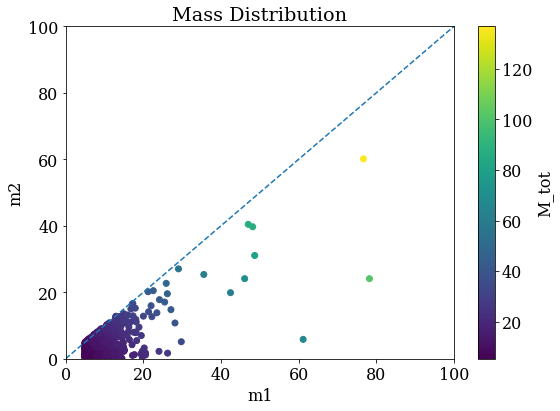

In [30]:
# Mass Distribution
plot_bias_features(df["m1"], df["m2"], df["M_tot"], colormap="viridis", mtot=None,\
    title="Mass Distribution", xlabel="m1", ylabel="m2", cbar_label="M_tot", plt_show=False)
mmax = 100
plt.xlim(0, mmax)
plt.ylim(0, mmax)
x=np.linspace(0, mmax, 10)
plt.plot(x, x, '--')


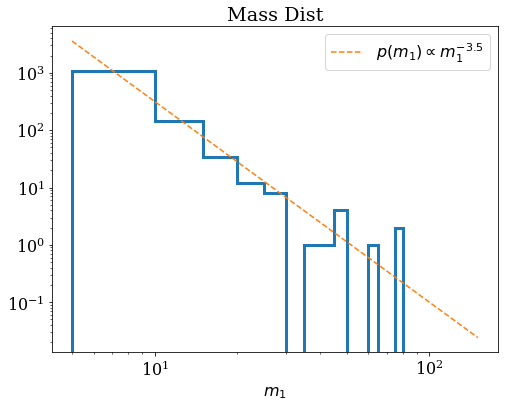

In [33]:
# Mass Distribution
fig, ax = plt.subplots(figsize=(8, 6))
bins = np.linspace(5, 150, 30)

x = np.linspace(5, 150, 100)
plt.hist(df["m1"], bins, histtype='step', lw=3)
plt.plot(x, 1000000*x**(-3.5), linestyle='--', label='$p(m_1) \propto m_1^{-3.5}$')

plt.loglog()

plt.xlabel("$m_1$")
plt.ylabel("")
plt.title("Mass Dist")
plt.legend()

# plt.savefig(plotdir+"powerlaw_m1_dist.pdf")
plt.show()

In [34]:
def p_z_madau_fragos(z, z_min, z_max):
    '''
    Return normalized z-distribution from the Madau Fragos (2017)
    star formation rate density.
    '''
    term_1 = (1+z)**(2.6)
    term_2 = 1 + ((1+z)/3.2)**(6.2)

    psi = 0.01 * term_1/term_2
    norm = np.sum(psi)
    psi = psi/norm

    return psi

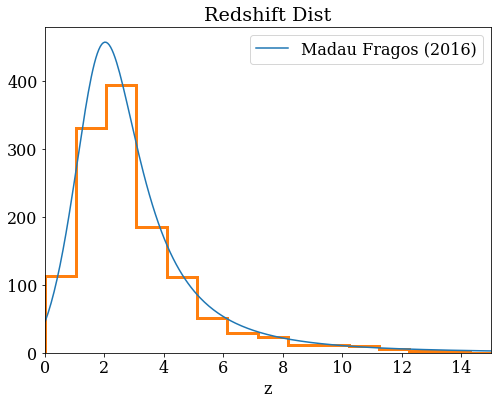

In [35]:
# Redshift Distribution
fig, ax = plt.subplots(figsize=(8, 6))
z_min = 0.02
z_max = 50
bins = np.linspace(z_min, z_max, 50)

z_range = np.linspace(z_min, z_max, 1000)
pdf_z = p_z_madau_fragos(z_range, z_min, z_max)
plt.plot(z_range, 30000*pdf_z, label="Madau Fragos (2016)")

plt.hist(df["z"], bins, histtype='step', lw=3)

plt.xlim(0, 15)

plt.legend()
plt.xlabel("z")
plt.ylabel("")
plt.title("Redshift Dist")
plt.show()

# Features

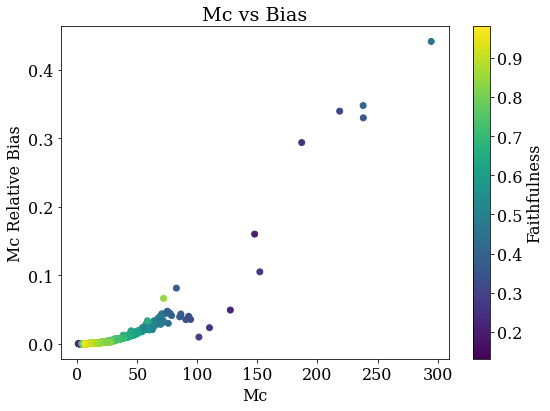

In [28]:
plot_bias_features(df["Mc"], np.abs(df["Mc_full_bias"]/df["Mc"]), df["full_inner_prod"], colormap="viridis",\
    title="Mc vs Bias", xlabel="Mc", ylabel="Mc Relative Bias", cbar_label="Faithfulness", savefig='mc_vs_bias')

Lower Mc events tend to have lower bias, higher faithfulness. Higher Mc events tend to have higher bias, lower faithfulness.

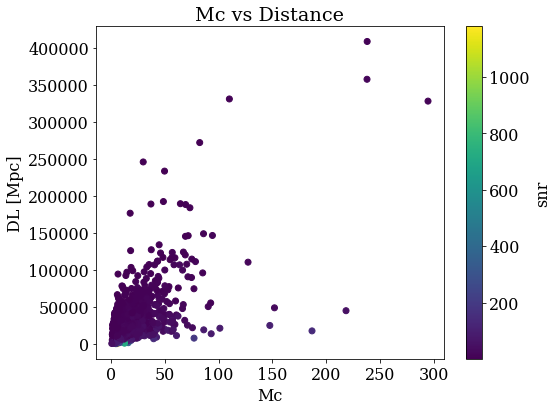

In [42]:
plot_bias_features(df["Mc"], df["DL"], df["snr"], colormap="viridis",\
    title="Mc vs Distance", xlabel="Mc", ylabel="DL [Mpc]", cbar_label="snr")

The events that made it through the gwbench pipeline have to be heavier if they are placed father away.

# Bias Stuff

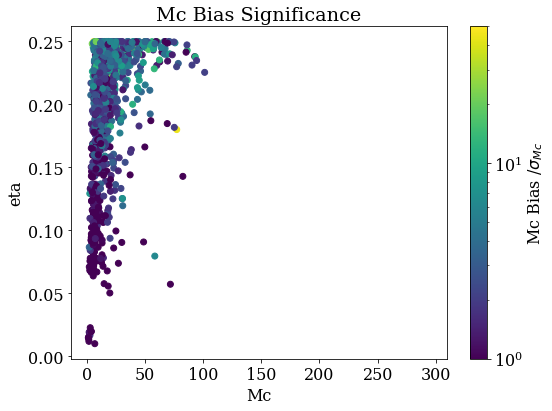

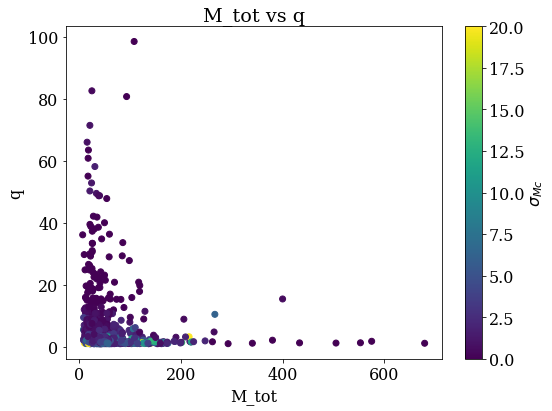

In [59]:
plot_bias_features(df["Mc"], df["eta"], df["Mc_full_bias"]/df["Mc_stat_err"], colormap="viridis",\
    title="Mc Bias Significance", xlabel="Mc", ylabel="eta", cbar_label="Mc Bias /$\sigma_{Mc}$", norm=matplotlib.colors.LogNorm(1, 50), savefig='mc_bias_sig_distribution')

plot_bias_features(df["M_tot"], df["q"], df["Mc_full_bias"]/df["Mc_stat_err"], colormap="viridis",\
    title="M_tot vs q", xlabel="M_tot", ylabel="q", cbar_label="$\sigma_{Mc}$", vmin=0, vmax=20)

All the events (so far) are biased more than 1 $\sigma$. The significance of the bias seems to be larger for migh Mc, unequal masses.

## Mc biases over lambda grid

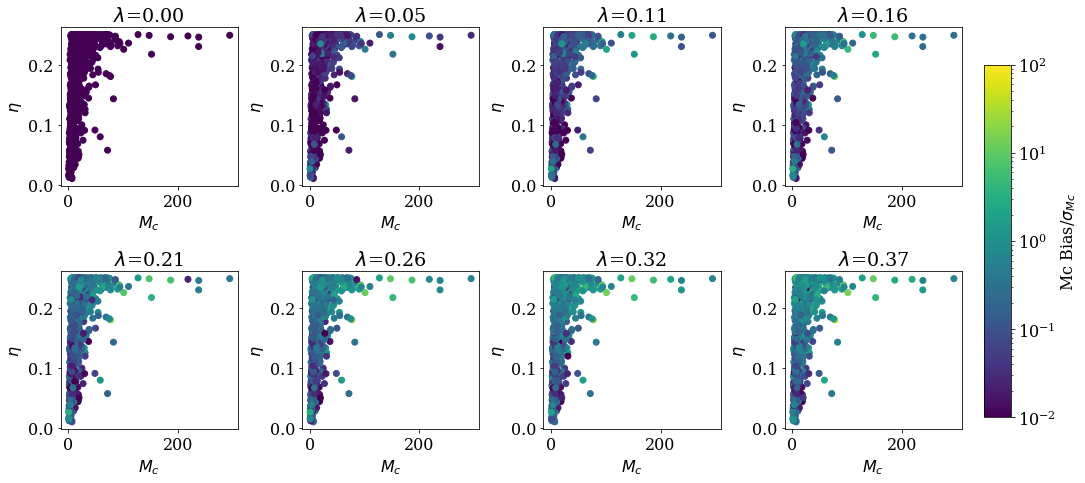

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 7))
lams_range = lams[:8]

for i, lam in enumerate(lams_range):
    ax = axes.flat[i]
    x= df["Mc"]
    y= df["eta"]
    c = df[f"bias_{i}"]/df["Mc_stat_err"]
    colormap="viridis"
    sc = ax.scatter(x,y, c=c, cmap=colormap, norm=matplotlib.colors.LogNorm(vmin=0.01, vmax=100))
    ax.set_ylabel("$\eta$")
    ax.set_xlabel("$M_c$")
    ax.set_title(f"$\lambda$={lams_range[i]:.2f}")

plt.tight_layout()

fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.92, 0.15, 0.025, 0.7])
fig.colorbar(sc, cax=cbar_ax, label="Mc Bias/$\sigma_{Mc}$")

plt.savefig(plotdir+'mc_bias_sig_vs_lambda_grid.pdf')
plt.show()
    

## Avg Bias vs Lambda

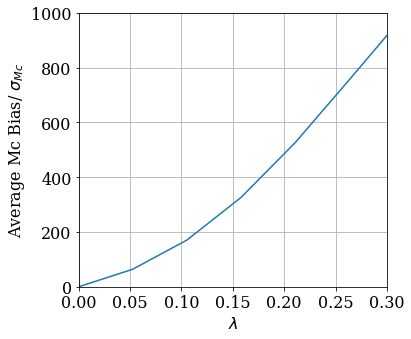

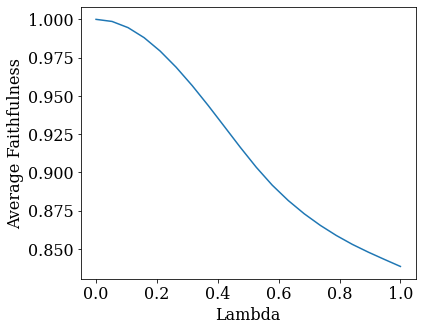

In [8]:
fig, ax = plt.subplots(figsize=(6, 5))

avg_bias_sig = np.sum(sig_bias_lams, axis=0)
plt.plot(lams, avg_bias_sig)

plt.xlim(0, 0.3)
plt.ylim(0, 1000)
plt.xlabel("$\lambda$")
plt.ylabel("Average Mc Bias/ $\sigma_{Mc}$")
plt.grid()
plt.tight_layout()
plt.savefig(plotdir+"avg_mc_bias_vs_lambda.pdf")
plt.show()

fig, ax = plt.subplots(figsize=(6, 5))

average_inner_prods =np.average(inner_prod_lams, axis=0)
plt.plot(lams, average_inner_prods)

plt.xlabel("Lambda")
plt.ylabel("Average Faithfulness")
plt.show()

## fraction of unbiased events vs lambda

In [9]:
unbiased_frac = np.zeros(n_lams)
for i in range(n_lams):
    bias = bias_lams.iloc[:,i].values
    stat_err = df["Mc_stat_err"].values
    unbiased_mask = (bias < stat_err)
    unbiased_frac[i] = np.sum(unbiased_mask)/len(df["Mc"])


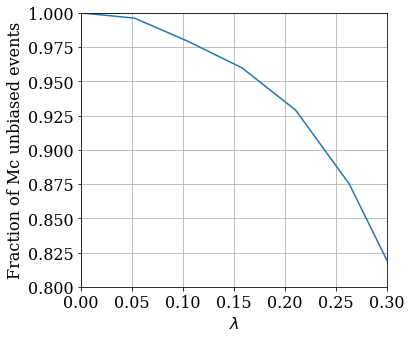

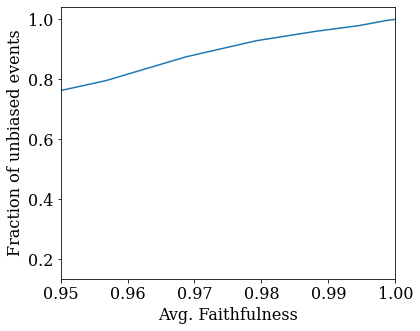

In [10]:
fig, ax = plt.subplots(figsize=(6, 5))
plt.plot(lams, unbiased_frac)
plt.xlabel("$\lambda$")
plt.ylabel("Fraction of Mc unbiased events")
plt.xlim(0, 0.3)
plt.ylim(0.8, 1.0)
plt.grid()
plt.tight_layout()
plt.savefig(plotdir+"mc_frac_unbiased_vs_lambda.pdf")
plt.show()

fig, ax = plt.subplots(figsize=(6, 5))
plt.plot(average_inner_prods, unbiased_frac)
plt.xlabel("Avg. Faithfulness")
plt.ylabel("Fraction of unbiased events")
plt.xlim(0.95, 1)
plt.show()